<a href="https://colab.research.google.com/github/paoloEZ/paoloEZ.github.io/blob/main/An%C3%A1lisis_exploratorio_diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Analisis diabetes

Este conjunto de datos proviene del Instituto Nacional de Diabetes y
Enfermedades Digestivas y Renales. El objetivo del conjunto de datos es predecir de forma diagnóstica si un paciente tiene diabetes

Los datos originales pueden ser descargados del siguiente link: https://www.kaggle.com/datasets/akshaydattatraykhare/diabetes-dataset

En base a los datos proporcionados vamos a resolver ciertas preguntas para determinar ciertos criterios en base a estas comparativas:
- Comparacion de niveles de insulina y edad
- Relacion de skinthickness e IMC
- Subdividir en 6 grupos el campo diabetespedigreefunction
- Porcentaje de los resultados



In [1]:
# importar librerias necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Lectura de datos y exploracion de datos
from google.colab import drive
drive.mount('/gdrive')
ruta = "/gdrive/MyDrive/diabetes.csv"
data = pd.read_csv(ruta)

Mounted at /gdrive


In [3]:
print(data.shape) # 768 filas y 9 columnas

(768, 9)


In [4]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
# tipos de varaibles
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
# Verificacion de valores nulos
pd.DataFrame(data.isnull().sum(), columns = ['Missing Values'])

,Missing Values
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [7]:
#Verificacion de columnas numericas para obtener valores de interes
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


A simple vista podemos observar que existen valores de 0 en los campos de "skinThickness" y BMI, lo cual es medicamente muy improbable, ya que en el caso de grosor de la piel, las personas tienen algo de grasa subcutánea en su cuerpo, incluso las personas más delgadas y atléticas, en el caso de BMI; Un BMI de 0 implicaría que el peso de la persona es 0, lo cual es físicamente imposible.
Vamos a proceder a contar cuantos de estos valores exiten en estos campos para saber si es viable eliminar estos registros de forma que no perjudiquen en nuestras futuras observaciones.

In [18]:
# Nombre de las dos columnas en las que deseas contar los valores 0
Col1 = 'SkinThickness'
Col2 = 'BMI'

# Contar los valores 0 en las columnas especificadas
total_0 = len(data[Col1] == 0)
#total_valores_0 = len(data[(data[Col1] == 0) & (data[Col2] == 0)])
#print(f'Total de valores 0 en {Col1} y {Col2}: {total_valores_0}')
print(total_0)

539


No es muy significativo, vamos a proceder a eliminar estos registros

In [9]:
# Eliminar filas donde columna1 o columna2 son 0
data = data[(data['SkinThickness'] != 0) & (data['BMI'] != 0)]

# Si quieres reasignar índices después de eliminar las filas
data.reset_index(drop=True, inplace=True)

# Ahora df no contendrá filas donde columna1 o columna2 son 0
print(data.shape)

(539, 9)


###Primera observacion: niveles de insulina y edades
Esta relacion pretende demostrar si existe un crecimiento en los niveles de insulina a medida que progresa la edad en los pacientes

In [ ]:
# Crearemos una tabla para  mostrar la cantidad de
rango_de_edades = ['20:30', '31:40', '41:50', '51:60', '61:70', '71:81']
limites_edades = [20, 30, 40, 50, 60, 70, 80]
niveles_de_insulina = ['0:99','100:125','126:846']
limites_insulina = [-1, 99, 125, 846]


data['Group of Ages'] = pd.cut(data['Age'], bins=limites_edades, labels=rango_de_edades)
data['level of Insulin'] = pd.cut(data['Insulin'], bins=limites_insulina, labels=niveles_de_insulina)
# Crear un DataFrame agregado que cuente los registros por nivel de insulina y grupo de edades
aggregated_data = data.groupby(['level of Insulin', 'Group of Ages']).size().reset_index(name='Count')



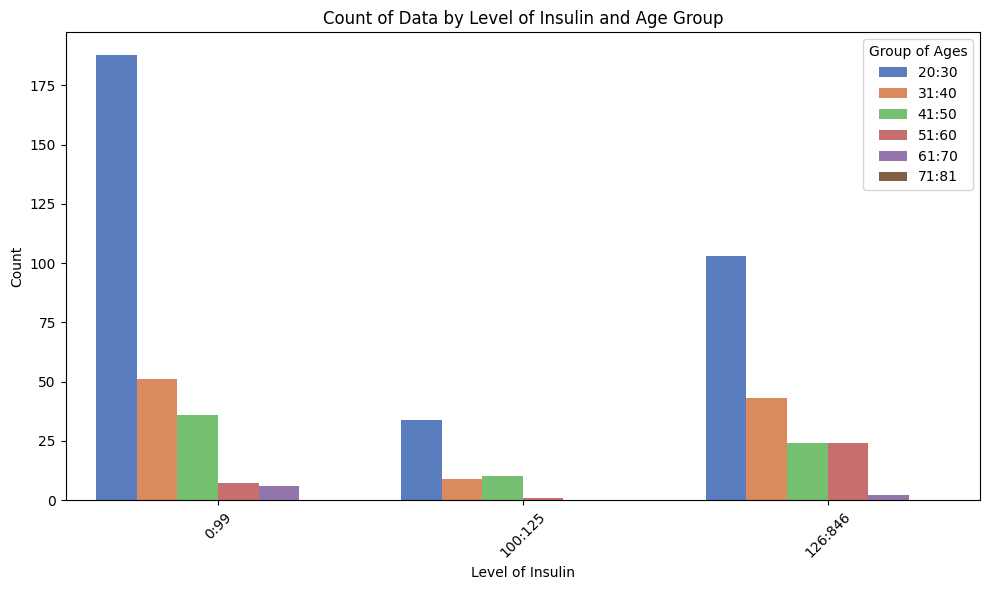

In [11]:
#Vamos a crear el grafico para estas dos nuevas columnas
plt.figure(figsize=(10, 6))
sns.barplot(data=aggregated_data, x='level of Insulin', y='Count', hue='Group of Ages', palette='muted')

## Add labels and titles
plt.xlabel('Level of Insulin')
plt.ylabel('Count')
plt.title('Count of Data by Level of Insulin and Age Group')

# Rotar las etiquetas del eje x para una mejor legibilidad
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

Primera observacion

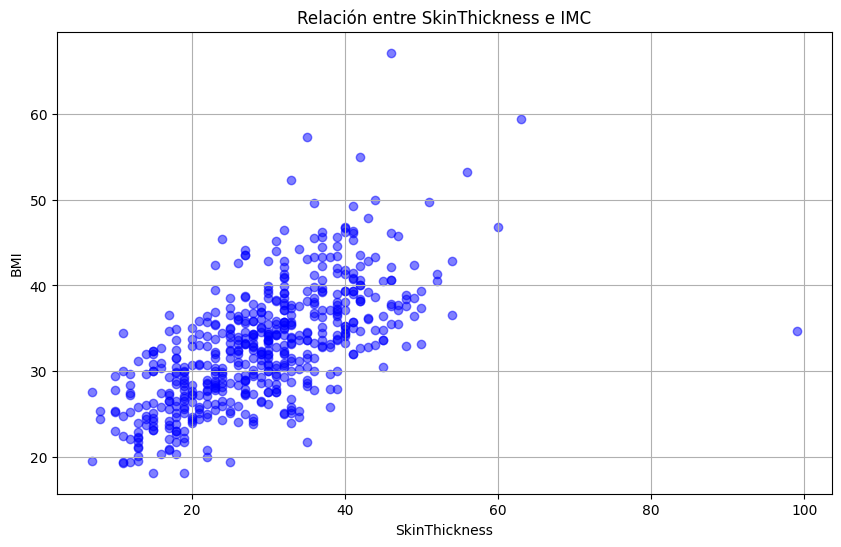

In [12]:
# Crear una gráfica de dispersión de SkinThickness vs. IMC
plt.figure(figsize=(10, 6))
plt.scatter(data['SkinThickness'], data['BMI'], alpha=0.5, color='b')

# Agregar etiquetas y título
plt.xlabel('SkinThickness')
plt.ylabel('BMI')
plt.title('Relación entre SkinThickness e IMC')

# Mostrar la gráfica
plt.grid(True)
plt.show()

Segunda observacion

In [13]:
# Definir los límites para los 6 grupos
limites_grupos = [0, 0.2, 0.4, 0.6, 0.8, 1.0, max(data['DiabetesPedigreeFunction'])]

# Etiquetas para los grupos
etiquetas_grupos = ['Grupo 1', 'Grupo 2', 'Grupo 3', 'Grupo 4', 'Grupo 5', 'Grupo 6']

# Aplicar la subdivisión en grupos
data['DiabetesPedigreeGroup'] = pd.cut(data['DiabetesPedigreeFunction'], bins=limites_grupos, labels=etiquetas_grupos)

# Se Muestra el DataFrame resultante
print(data[['DiabetesPedigreeFunction', 'DiabetesPedigreeGroup']])

     DiabetesPedigreeFunction DiabetesPedigreeGroup
0                       0.627               Grupo 4
1                       0.351               Grupo 2
2                       0.167               Grupo 1
3                       2.288               Grupo 6
4                       0.248               Grupo 2
..                        ...                   ...
534                     0.403               Grupo 3
535                     0.171               Grupo 1
536                     0.340               Grupo 2
537                     0.245               Grupo 2
538                     0.315               Grupo 2

[539 rows x 2 columns]


In [14]:
data['Outcome'].value_counts() / len(data) * 100

0    66.604824
1    33.395176
Name: Outcome, dtype: float64

ultima observacion observacion

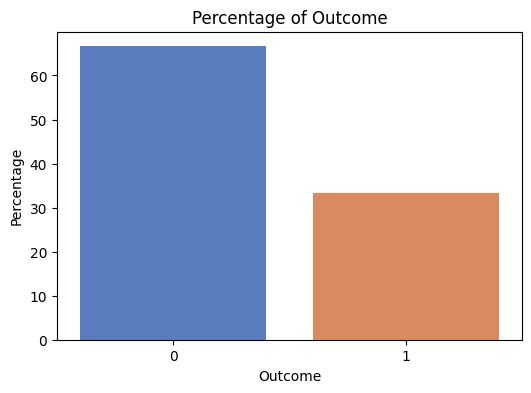

In [15]:
percentage_data = (data['Outcome'].value_counts(normalize=True) * 100).reset_index()
percentage_data.columns = ['Outcome', 'Percentage']

plt.figure(figsize=(6, 4))
sns.barplot(x='Outcome', y='Percentage', data=percentage_data, palette='muted')

plt.xlabel('Outcome')
plt.ylabel('Percentage')
plt.title('Percentage of Outcome')

plt.show()
